## Importing required libraries

In [44]:
import nltk
import numpy as np
import pandas as pd
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,roc_auc_score,confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

## Loading the dataset

In [20]:
dataset = pd.read_csv("spam.csv",encoding='ISO-8859-1')
df = pd.DataFrame(dataset)

## Data preprocessing

In [21]:
df.pop('Unnamed: 2')
df.pop('Unnamed: 3')
df.pop('Unnamed: 4')
df['v1'] = df.pop('v1')

In [22]:
df.columns = ['data','labels']

In [23]:
df.head()

,data,labels
0,"Go until jurong point, crazy.. Available only ...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives aro...",ham


In [24]:
df['b_labels'] = pd.Series([1 if label == 'spam' else 0 for label in df['labels']])

In [25]:
df.head()

,data,labels,b_labels
0,"Go until jurong point, crazy.. Available only ...",ham,0
1,Ok lar... Joking wif u oni...,ham,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam,1
3,U dun say so early hor... U c already then say...,ham,0
4,"Nah I don't think he goes to usf, he lives aro...",ham,0


## Train test split

In [26]:
X = df.iloc[:,0].values
y = df.iloc[:,-1].values

In [27]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33)

## Vectorization

In [28]:
cv = CountVectorizer(stop_words='english')
X_train = cv.fit_transform(X_train)
X_test = cv.transform(X_test)

In [29]:
X_train.shape

(3733, 6720)

## Training the model

In [30]:
model = MultinomialNB()
model.fit(X_train,y_train)
print("train acc:", model.score(X_train, y_train))
print("test acc:", model.score(X_test, y_test))

train acc: 0.995981784087865
test acc: 0.9831430125067971


## Evaluating the model

In [31]:
y_pred_train = model.predict(X_train)
print("Train Results:")
print(classification_report(y_train,y_pred_train))

Train Results:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3250
           1       0.99      0.98      0.98       483

    accuracy                           1.00      3733
   macro avg       0.99      0.99      0.99      3733
weighted avg       1.00      1.00      1.00      3733



In [32]:
y_pred = model.predict(X_test)
print("Test Results:")
print(classification_report(y_test,y_pred))

Test Results:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1575
           1       0.96      0.92      0.94       264

    accuracy                           0.98      1839
   macro avg       0.98      0.96      0.97      1839
weighted avg       0.98      0.98      0.98      1839



In [33]:
# ROC-AUC score because there is class imbalance.

Prob_train = model.predict_proba(X_train)[:,1]
Prob_test = model.predict_proba(X_test)[:,1]
print("train AUC:", roc_auc_score(y_train, Prob_train))
print("test AUC:", roc_auc_score(y_test, Prob_test))

train AUC: 0.9985736582258322
test AUC: 0.9809692159692159


In [36]:
print(confusion_matrix(y_test,y_pred))

[[1566    9]
 [  22  242]]


## Visualisation

<Axes: >

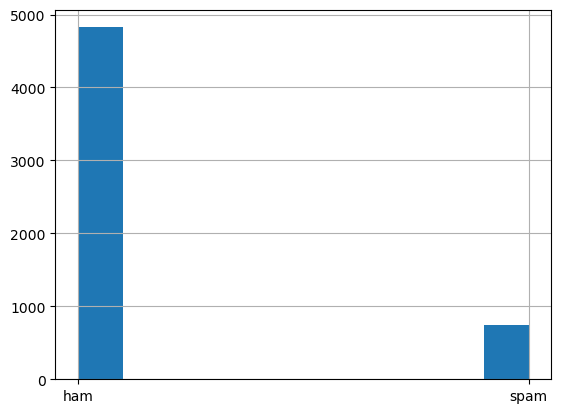

In [37]:
df['labels'].hist()